In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

In [3]:
# Reading in Images

In [4]:
horse_files = glob('/content/drive/MyDrive/CNN/horses/*.jpg')
cat_files = glob('/content/drive/MyDrive/CNN/cats/*.jpg')

In [5]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])

In [6]:
img_mpl.shape, img_cv2.shape

((267, 399, 3), (267, 399, 3))

array([[[143, 113,  85],
        [142, 112,  84],
        [141, 111,  83],
        ...,
        [127, 108, 101],
        [122, 103,  96],
        [120, 101,  94]],

       [[142, 112,  84],
        [142, 112,  84],
        [144, 114,  86],
        ...,
        [124, 105,  98],
        [119, 100,  93],
        [117,  98,  91]],

       [[139, 110,  80],
        [141, 112,  82],
        [144, 115,  85],
        ...,
        [120, 101,  94],
        [116,  97,  90],
        [115,  96,  89]],

       ...,

       [[144, 129, 110],
        [151, 136, 117],
        [143, 127, 111],
        ...,
        [148, 129, 114],
        [147, 128, 113],
        [145, 126, 111]],

       [[150, 135, 116],
        [157, 142, 123],
        [149, 133, 117],
        ...,
        [151, 132, 117],
        [149, 130, 115],
        [148, 129, 114]],

       [[154, 138, 122],
        [161, 145, 129],
        [153, 137, 121],
        ...,
        [154, 135, 120],
        [152, 133, 118],
        [151, 132, 117]]], dtype=uint8)
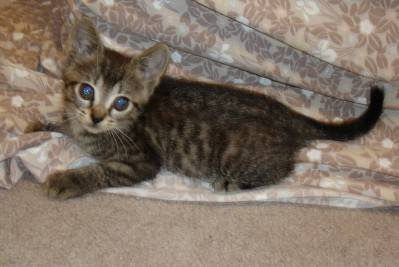

In [7]:
img_mpl

In [8]:
img_mpl.max()

233

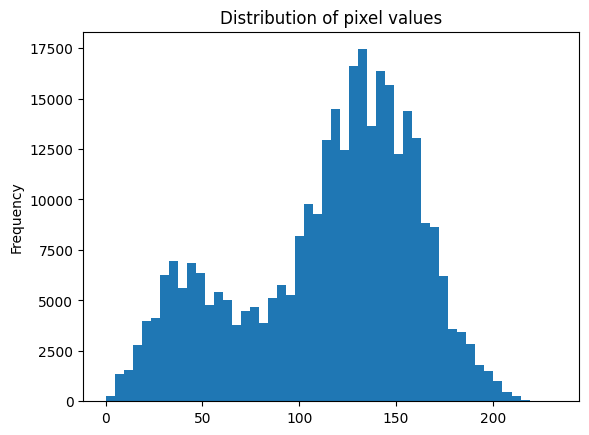

In [9]:
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title='Distribution of pixel values')
plt.show()

In [10]:
# Display Images

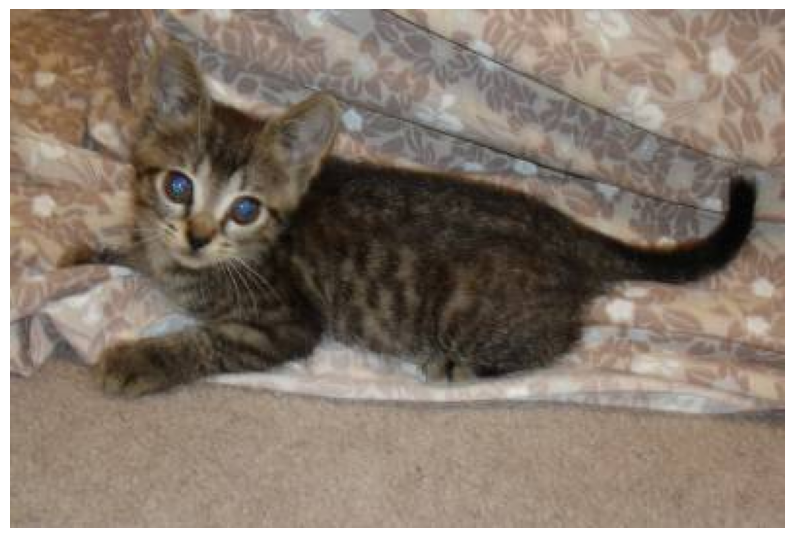

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

In [12]:
# Image Channels (RGB)

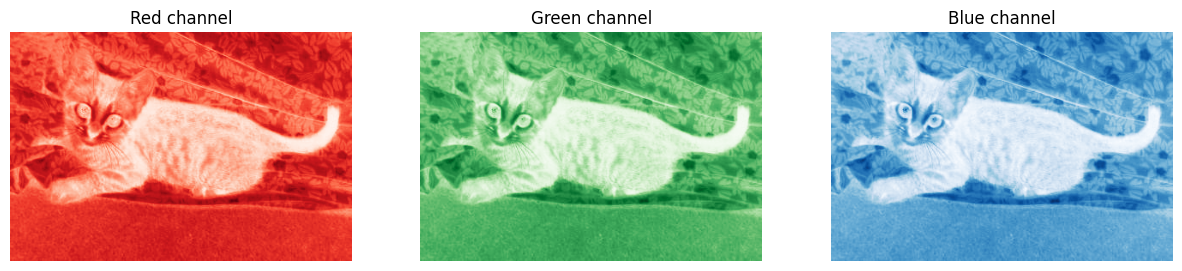

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

In [14]:
# Matplotlib vs cv2 Numpy Arrays
# cv2 reads in channels as BGR
# matplotlib reads in channels as RGB

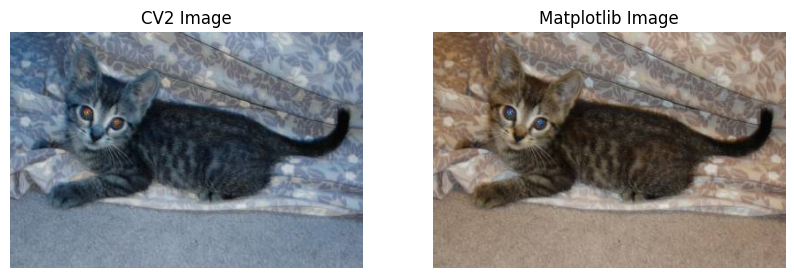

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

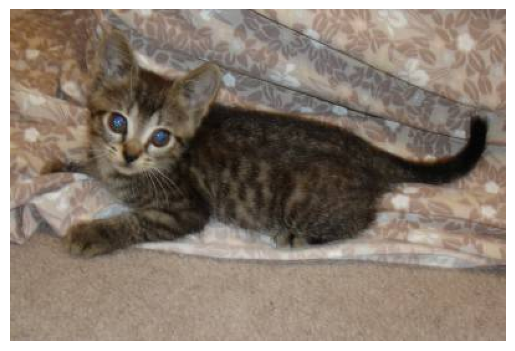

In [16]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

In [17]:
# Image Manipulation

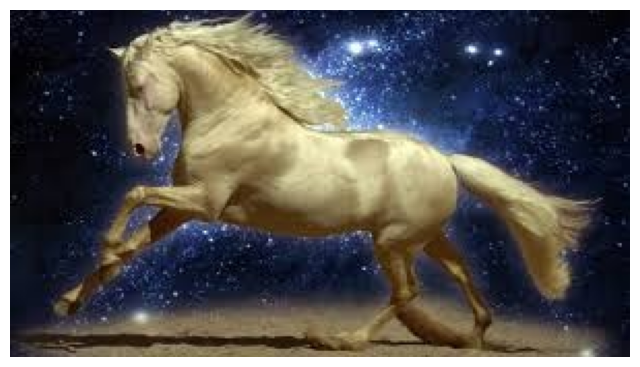

In [18]:
img = plt.imread(horse_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

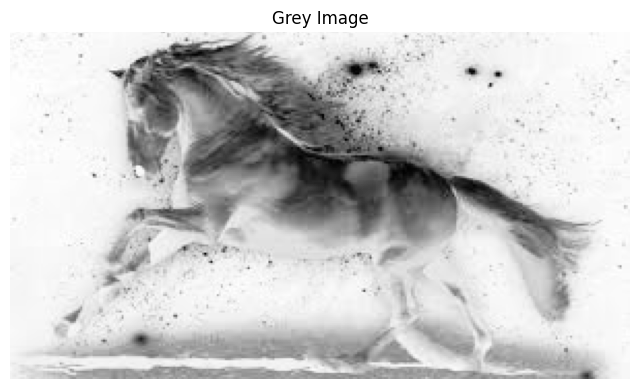

In [20]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

In [21]:
# Resizing and Scaling

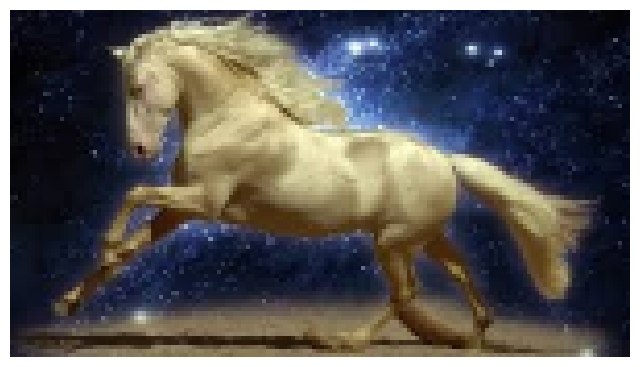

In [24]:
img_resized = cv2.resize(img, None, fx=0.50, fy=0.50)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

In [27]:
img.shape, img_resized.shape

((168, 300, 3), (84, 150, 3))

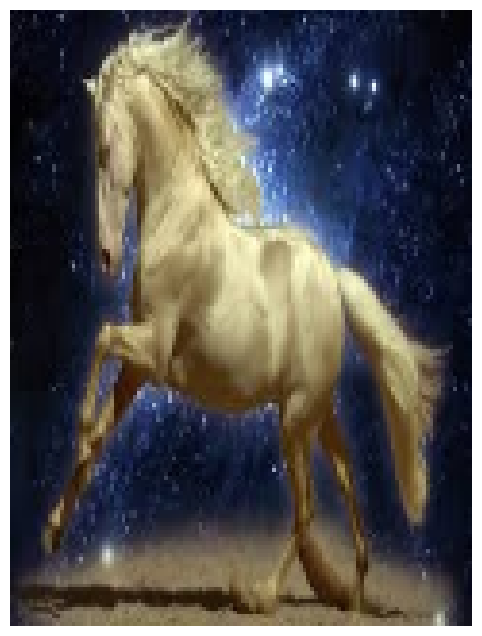

In [30]:
# Different
img_resize = cv2.resize(img, (120, 160))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

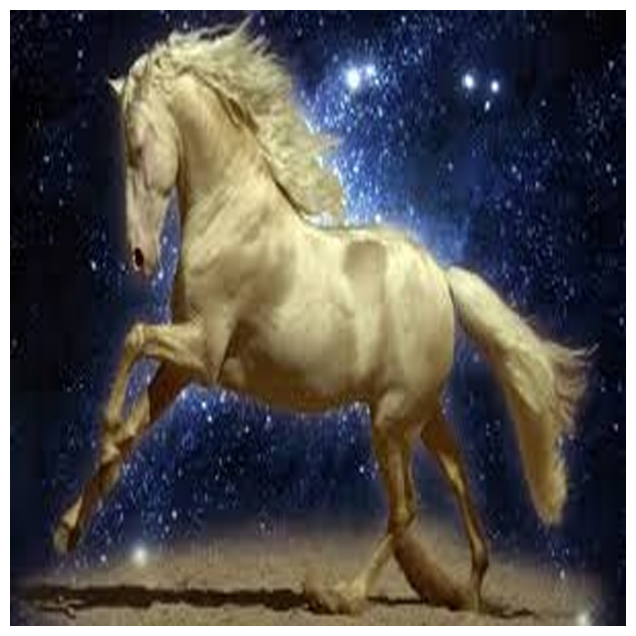

In [31]:
img_resizee = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resizee)
ax.axis('off')
plt.show()

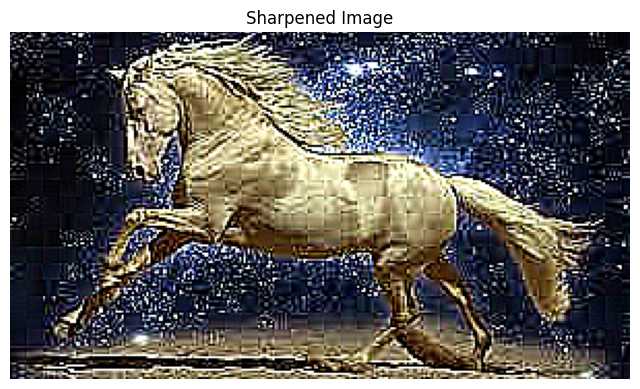

In [32]:
# Sharpen first
kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

In [33]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
kernel_3x3

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

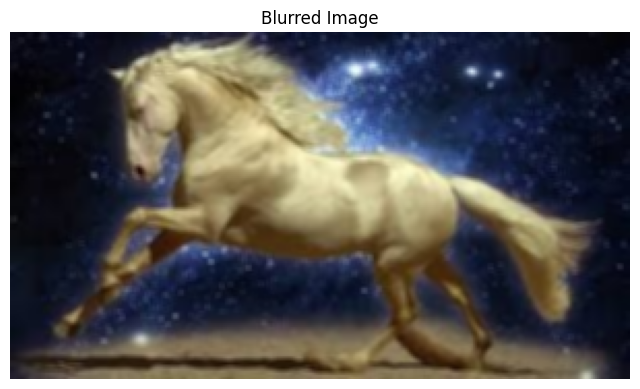

In [34]:
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()